# Absorption

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Daten

In [138]:
df_withoutFoil = pd.read_csv('HG2_23_1.STN',sep = "\s+|\t+|\s+\t+|\t+\s+",  header= None, names=['winkel', 'intensitaet', 'untergrund'], encoding = 'unicode_escape',  skiprows= list(range(0,22))) 


C:\Users\Leo\AppData\Local\Temp\ipykernel_14492\1923983967.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_withoutFoil = pd.read_csv('HG2_23_1.STN',sep = "\s+|\t+|\s+\t+|\t+\s+",  header= None, names=['winkel', 'intensitaet', 'untergrund'], encoding = 'unicode_escape',  skiprows= list(range(0,22)))


In [139]:
d = 1.9314e-10


## Definitions

In [140]:
def thetatolamda(thetha, d, m):
    return 2*d*np.sin(thetha*np.pi/180)/m

def intensitylamda(Int, theta, d):
    return Int/(2*d*np.cos(theta*np.pi/180))

## Umrechnen

In [146]:
wellenlaenge = thetatolamda(df_withoutFoil.loc[:,'winkel']/2,d,1)
df_withoutFoil['wellenlaenge'] = wellenlaenge 
df_withoutFoil['wellenlaengeinAnstrom'] = df_withoutFoil['wellenlaenge'] * 1e10

Spektrum

In [142]:
df_withoutFoil['intensitaet_lamda'] = intensitylamda(df_withoutFoil['intensitaet'], df_withoutFoil['winkel']/2,d)

## Plots

   winkel  intensitaet  untergrund  wellenlaenge  wellenlaengeinAnstrom   
0     5.0          453         363  8.424648e-12               0.084246  \
1     5.1          363         363  8.593031e-12               0.085930   
2     5.2          404         407  8.761408e-12               0.087614   
3     5.3          478         494  8.929777e-12               0.089298   
4     5.4          713         582  9.098140e-12               0.090981   

   intensitaet_lamda  
0       1.173842e+12  
1       9.406643e+11  
2       1.046951e+12  
3       1.238769e+12  
4       1.847863e+12  


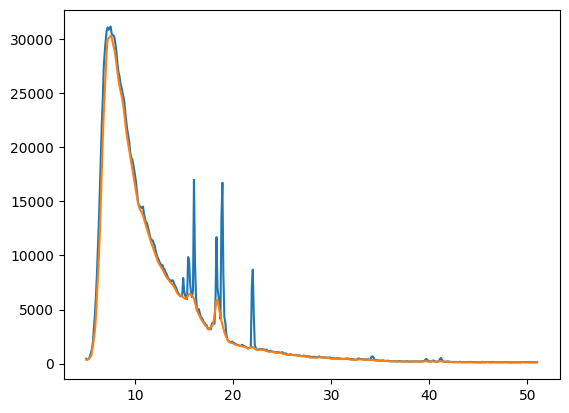

In [143]:
print(df_withoutFoil.head())
plt.plot(df_withoutFoil.loc[:,'winkel'], df_withoutFoil.loc[:,'intensitaet'])
plt.plot(df_withoutFoil.loc[:,'winkel'], df_withoutFoil.loc[:,'untergrund'])

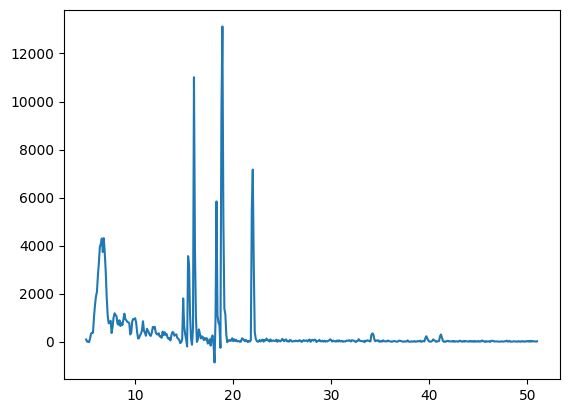

In [144]:
plt.plot(df_withoutFoil.loc[:,'winkel'], df_withoutFoil.loc[:,'intensitaet']-df_withoutFoil.loc[:,'untergrund'])


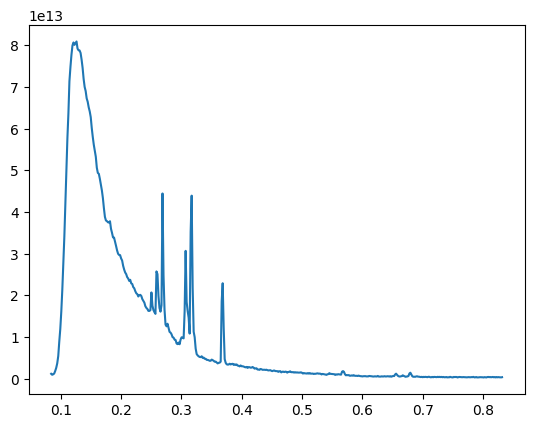

In [145]:
plt.plot(df_withoutFoil['wellenlaengeinAnstrom'], df_withoutFoil['intensitaet_lamda'])
#plt.vlines(2)